In this jupyter notebook, I will be briefly looking through some historical trends based on the number of numbers and the 
number of comments of posts from NUSWhispers's website (https://www.nuswhispers.com). If you are not interested in the code, this will be at most be a  **5 minute read**.

The data was scraped using a Python command line application that I build, the Github repository of the code for the application can be found at https://github.com/yaofeng-wang/NUSWhispers_scraper. The data can be found at https://github.com/yaofeng-wang/NUSWhispers_scraper/tree/master/output. If you have any suggestion/criticism, please contact me at yaofeng96@gmail.com . 

In the following cells, I will refer to each post in NUSWhispers as a 'Whisper'. If you are not interested in the code,
feel free to skip the 'Data pre-processing' section that will follow immediately and proceed to the 'Overview of data' 
section.

### Data pre-processing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
from datetime import date, datetime
from dateutil.relativedelta import relativedelta

# Label each bar plot with the value on top of each bar
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
def autolabel(rects, dtype):
    for rect in rects:
        height = rect.get_height()
        if dtype == 'int':
            ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), 
                        textcoords="offset points",
                        ha='center', va='bottom')
        else:
            ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), 
                        textcoords="offset points",
                        ha='center', va='bottom')

In [8]:
df53000to53999 = pd.read_excel("./posts53000to53999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df54000to54999 = pd.read_excel("./posts54000to54999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df55000to55999 = pd.read_excel("./posts55000to55999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df56000to56999 = pd.read_excel("./posts56000to56999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df57000to57999 = pd.read_excel("./posts57000to57999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df58000to58999 = pd.read_excel("./posts58000to58999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df59000to59999 = pd.read_excel("./posts59000to59999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df60000to60999 = pd.read_excel("./posts60000to60999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df61000to61999 = pd.read_excel("./posts61000to61999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df62000to62999 = pd.read_excel("./posts62000to62999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df63000to63999 = pd.read_excel("./posts63000to63999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df64000to64999 = pd.read_excel("./posts64000to64999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df65000to65999 = pd.read_excel("./posts65000to65999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df66000to66999 = pd.read_excel("./posts66000to66999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df67000to67999 = pd.read_excel("./posts67000to67999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])

df = pd.concat([df53000to53999, df54000to54999, df55000to55999, df56000to56999, df57000to57999, df58000to58999, 
                df59000to59999, df60000to60999, df61000to61999, df62000to62999, df63000to63999, df64000to64999, 
                df65000to65999, df66000to66999, df67000to67999], axis=0)

In [9]:
# Convert post_age to month-year string
# e.g. '2 months ago' becomes 'Jun-19'
#      '9 months ago' becomes 'Nov-18'
#      'a month ago' becomes  'Jul-19'
#      '2 hours ago' becomes  'Aug-19'
def get_post_age(x):
    first_word, second_word = x.split(" ")[0], x.split(" ")[1]
    current_date = date(year=2019,month=8,day=1)
    post_posted_on = None
    if second_word == 'months':
        post_posted_on = current_date -  relativedelta(months=int(first_word))
    elif second_word == 'month':
        post_posted_on = current_date -  relativedelta(months=1)
    else:
        post_posted_on = current_date
    return post_posted_on.strftime("%b-%y")
        
# https://stackoverflow.com/questions/48042915/sort-a-pandass-dataframe-series-by-month-name/48043319
months = ["Oct-18", "Nov-18", "Dec-18", "Jan-19", "Feb-19", "Mar-19", "Apr-19", "May-19", "Jun-19", "Jul-19", "Aug-19"]
df['month'] = pd.Categorical(df['post_age'].apply(get_post_age), categories=months, ordered=True)

# There were some Whispers without num_likes 57766, 57778, 57784, 57787, 57792, 57877, 57879
# Unable to find posts on Facebook
df['num_likes'] = df['num_likes'].apply(lambda x: 0 if x == 'None' else int(x))

### Overview of data

Let us first dip our feet into the pool by taking a look at the general overview of our data. We will start by plotting the 
number of Whispers posted in each month.

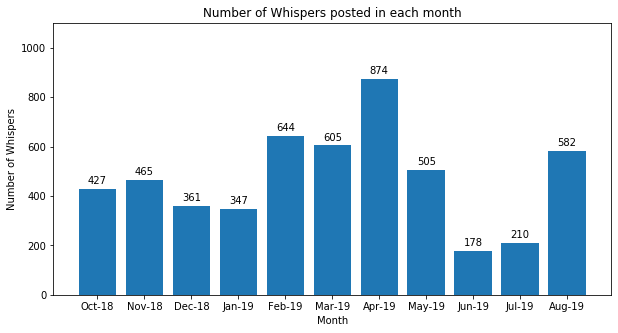

In [11]:
plt.figure(figsize=(10,5))
plots = plt.bar(months, df['month'].value_counts().sort_index())
plt.title('Number of Whispers posted in each month')
plt.xlabel("Month")
plt.ylabel('Number of Whispers')
plt.ylim(0, 1100)
ax = plt.gca()
autolabel(plots, 'int')

From this bar plot above, it seems that the number of  Whispers dipped significantly during June and July, which might be  due to the summer vacation. There also seems to be a spike during April.

Let us take a quick look at the number of likes, then the number of comments.

In [12]:
df.describe()['num_likes']

count    5198.000000
mean       12.121393
std        46.291757
min         0.000000
25%         1.000000
50%         3.000000
75%         9.000000
max      1159.000000
Name: num_likes, dtype: float64

From the summary above, we see that the distribution for the number of likes has a very large spread, with values from
0(min) to 1159(max). Even though the max is 1159, the mean is only 12.6 and the mean is only 3. 

Since the bar plot for num_likes is not very pleasing to the eyes, I shall ommit it. For those who are curious, the code
can be found in the cell below.

For those interesting, the Whispers with the top 3 highest number of likes can be found here:

1. 1159 likes: https://www.nuswhispers.com/tag/60498
2. 1071 likes: https://www.nuswhispers.com/tag/63802
3. 1013 likes: https://www.nuswhispers.com/tag/62143

In [ ]:
'''
df2 = df['num_likes'].value_counts().sort_index().reset_index()
highest_num_likes = max(df['num_likes'])
for i in range(highest_num_likes):
    if i not in df2['index'].values:
        df2.append(pd.DataFrame([[i, 0]]))
        
plt.figure(figsize=(8,5))
plt.xlabel("Number of likes")
plt.ylabel('Number of posts with the corresponding number of likes')
plt.bar(df2['index'], df2['num_likes'])
'''

Let's move on to the number of comments.

In [14]:
df.describe()['num_comments']

count    5191.000000
mean        7.001734
std         7.565933
min         0.000000
25%         1.000000
50%         4.000000
75%        10.000000
max        25.000000
Name: num_comments, dtype: float64

As compared to the number of likes, the distribution for the number of comments is much more closely packed, 
with values from 0(min) to 25(max). 

Taking a closer look at the plot for num_comments shown below, we see that num_comments seems to have a upper limit of 25. 
However, it seems that I wasn't the only person to have noticed this issue (https://www.nuswhispers.com/tag/67447). Since this hard limit only occurs on the NUSWhispers website, if you were to visit their Facebook page, you would still be able 
to see the real number of comments. Therefore, We will have to take note that if the number of comments for a Whisper
is 25, this number could actually be an underestimate for the real number of comments.

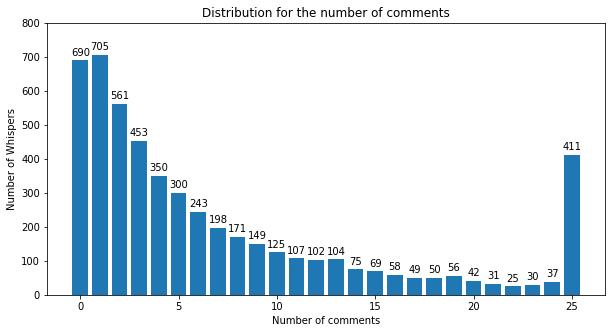

In [15]:
plt.figure(figsize=(10,5))
plt.title("Distribution for the number of comments")
plt.xlabel("Number of comments")
plt.ylabel('Number of Whispers')
plt.ylim(0, 800)
plots = plt.bar(np.arange(26), df['num_comments'].value_counts().sort_index())
ax = plt.gca()
autolabel(plots, 'int')

### Trend 1: Increase in the proportion of Whispers with a high number of likes.

Let's first look at the total number of likes in each month.

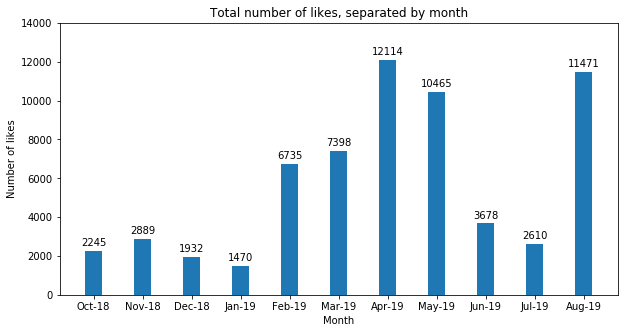

In [16]:
plt.figure(figsize=(10,5))
width = 0.35
plots = plt.bar(months, df.groupby(['month']).agg({'num_likes':'sum'}).sort_index()['num_likes'], width)
plt.title("Total number of likes, separated by month")
plt.ylabel('Number of likes')
plt.xlabel('Month')
plt.ylim(0, 14000)
ax = plt.gca()
autolabel(plots, 'int')

The plot above seems to be hinting at a general increase in the number of likes over time. 

However, let's have a closer look. We can bucketize the number of likes into a few discrete buckets and look at the number of Whispers in each bucket, in each month as shown below. We see that the length of the red rectangle, which represents the number of Whispers with more than 20 likes has gradually increased. 

FYI, the three groups "0 to 9", "10 to 20", and "more than 20 likes" were chosen arbitrarily.

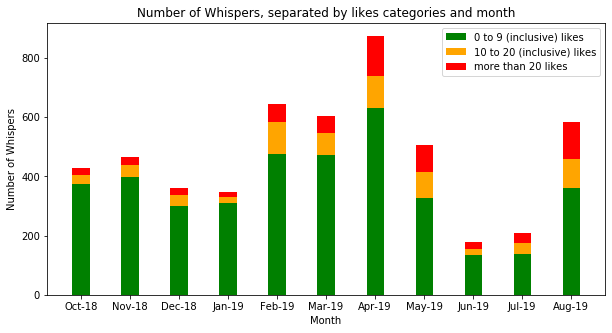

In [19]:
# Divide num_likes into a smaller number of categories
def num_likes_bins(x):
    if int(x) <= 9:
        return 0
    elif int(x) <= 20:
        return 1
    else:
        return 2
df['num_likes_group'] = df['num_likes'].apply(num_likes_bins)

df2 = df.groupby(['month', 'num_likes_group'], as_index=False).size().reset_index()
width = 0.35

num_likes_group_0 = df2.loc[df2['num_likes_group'] == 0, 0].values
num_likes_group_1 = df2.loc[df2['num_likes_group'] == 1, 0].values
num_likes_group_2 = df2.loc[df2['num_likes_group'] == 2, 0].values

plt.figure(figsize=(10,5))
p1 = plt.bar(months, num_likes_group_0, width, color='green')
p2 = plt.bar(months, num_likes_group_1, width, bottom = num_likes_group_0, color='orange')
p3 = plt.bar(months, num_likes_group_2, width, bottom = num_likes_group_0 + num_likes_group_1, color='red')


plt.title("Number of Whispers, separated by likes categories and month")
plt.ylabel('Number of Whispers')
plt.xlabel('Month')
plt.legend((p1[0], p2[0], p3[0]), ('0 to 9 (inclusive) likes', '10 to 20 (inclusive) likes', 'more than 20 likes'))

Just to drive the point home, we can look at the mean number of likes, in each month, as shown below. We see that the
later months do seem to have a higher mean number of likes than the earlier months.

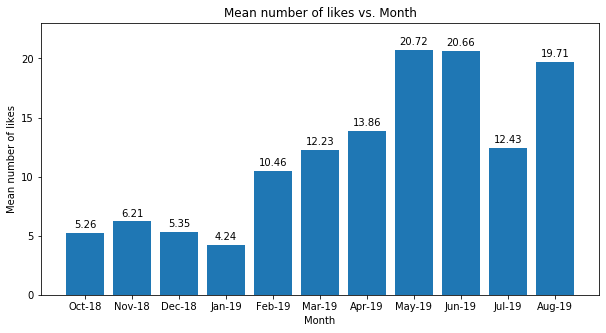

In [18]:
df1 = df.groupby(['month']).agg({'num_likes':'sum'})
df2 = df['month'].value_counts()
df3 = pd.concat([df1, df2], axis=1)
df3['num_likes_per_post'] = df3['num_likes'] / df3['month']
plt.figure(figsize=(10, 5))
p1 = plt.bar(months, df3['num_likes_per_post'].sort_index())
plt.title('Mean number of likes vs. Month')
plt.xlabel('Month')
plt.ylabel('Mean number of likes')
plt.ylim(0, 23)
ax = plt.gca()
autolabel(p1, 'float')

### Trend 2: Increase in the proportion of Whispers with a high number of comments.

As we have done previously, we can first take a look at the number of comments separated by month. 

Note that since there is a hard upper limit of 25 comments for each Whisper on the NUSWhispers's website, the values below are underestimates of 
the real number of comments posted in each month.

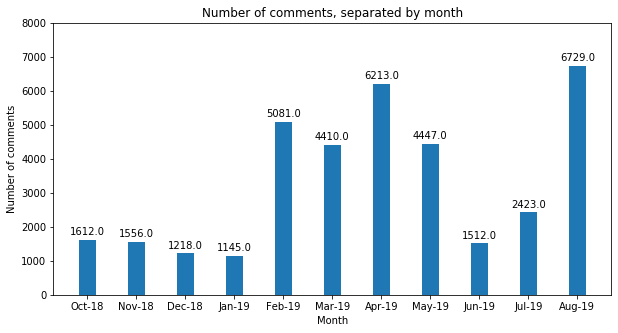

In [302]:
plt.figure(figsize=(10,5))
width = 0.35
plots = plt.bar(months, df.groupby(['month']).agg({'num_comments':'sum'}).sort_index()['num_comments'], width)
plt.title("Number of comments, separated by month")
plt.ylabel('Number of comments')
plt.xlabel('Month')
plt.ylim(0, 8000)
ax = plt.gca()
autolabel(plots, 'int')

Then, we can also bucketise the number of comments into a fewer number of discrete bins (3 in this case) and 
look at the number of comments in each bin, in each month, as shown below. Similary to the situation in the number of likes, the length of the red bar show below seems to be increasing.

In [ ]:
# Divide num_likes into a smaller number of categories
def num_comments_bins(x):
    if x <= 12:
        return 0
    elif x <= 24:
        return 1
    else: # 25 or more
        return 2
df['num_comments_group'] = df['num_comments'].apply(num_comments_bins)

df2 = df.groupby(['month', 'num_comments_group'], as_index=False).size().reset_index()

width = 0.35

num_comments_group_0 = df2.loc[df2['num_comments_group'] == 0, 0].values
num_comments_group_1 = df2.loc[df2['num_comments_group'] == 1, 0].values
num_comments_group_2 = df2.loc[df2['num_comments_group'] == 2, 0].values

plt.figure(figsize=(10,5))
p1 = plt.bar(months, num_comments_group_0, width, color='green')
p2 = plt.bar(months, num_comments_group_1, width, bottom = num_comments_group_0, color='orange')
p3 = plt.bar(months, num_comments_group_2, width, bottom = num_comments_group_0 + num_comments_group_1, color='red')

plt.title("Number of Whispers, separated by comments categories and month")
plt.ylabel('Number of Whispers')
plt.xlabel('Month')
plt.legend((p1[0], p2[0], p3[0]), ('0 to 12 (inclusive) comments', '13 to 24 (inclusive) comments', '25 comments or more'))

Lastly, we can look at the mean number of comments, in each month, as shown below. We see that the
later months do seem to have a higher mean number of likes than the earlier months.

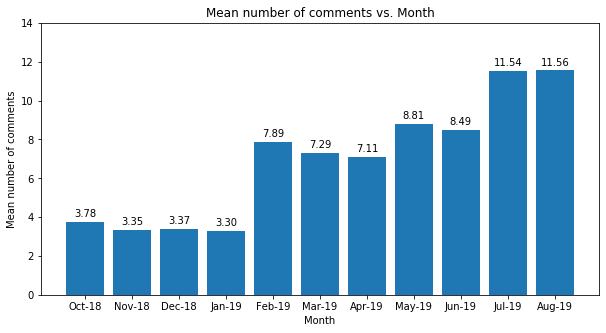

In [313]:
df1 = df.groupby(['month']).agg({'num_comments':'sum'})
df2 = df['month'].value_counts()
df3 = pd.concat([df1, df2], axis=1)
df3['num_comments_per_post'] = df3['num_comments'] / df3['month']
plt.figure(figsize=(10, 5))
p1 = plt.bar(months, df3['num_comments_per_post'].sort_index())
plt.title('Mean number of comments vs. Month')
plt.xlabel('Month')
plt.ylabel('Mean number of comments')
plt.ylim(0, 14)
ax = plt.gca()
autolabel(p1, 'float')

Thank you for looking through this jupyter notebook! Once again If you have any suggestion/criticism, please contact me at yaofeng96@gmail.com. Have a good day :) (Last update: 12-Aug-2019)